<a href="https://colab.research.google.com/github/amandaverissimo/tarifas-internacionais/blob/main/MVP_Sprint_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Dados_ANAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarifas Aéreas Internacionais no Brasil - de janeiro de 2023 a abril de 2024

As informações contidas nesse Notebook lançam luz sobre os registros de tarifas aéreas referentes aos serviços de transporte aéreo internacional. Os dados são disponibilizados pela Agência Nacional de Aviação Civil (Anac) para fins de acompanhamento das tarifas aéreas efetivamente vendidas e realização de estudos sobre o transporte aéreo. ​

###Contexto:
A todo momento as notícias dão conta do aumento das passagens aéreas no Brasil e no mundo. É possível perceber que as companhias têm tomado medidas para baratear os custos para si - preterindo o conforto e satisfação dos clientes - e estabilizar os repasses. Ainda assim, segundo Silvio Costa Filho - Ministro de Portos e Aeroportos do Brasil - houve um aumento do preço das passagens no mundo, mais de 15% de maneira global (CNN, 2024).
É possível apontar como Problema, portanto, a alta nas tarifas de transporte aéreo internacional.
Nesse sentido é pertinente a observação desse movimento através dos dados disponibilizados pela Agência Nacional de Aviação Civil (Anac), que visa acompanhar a trajetória das passagens ofertadas por Companhias Aéreas que operam no Brasil e monitorar o setor.<br>
<br>


###Objetivo:
Realizar análise exploratória dos datasets a fim de propiciar a posterior criação de um algoritmo de máquina assertivo para predição das tarifas aéreas, considerando as mais diversas variáveis. O acesso aos dados de venda e condições de alocação permitem notar o comportamento do consumidor frente a oferta das companhias, bem como observar o movimento do mercado. O estudo desse contexto será a base para alcançar o objetivo de perceber quais variáveis impactam o valor das tarifas e fazer previsões sobre o preço dos voos. Futuramente, a partir dessa análise e processamento de dados, traçar modelos preditivos supervisionados capazes de gerar insights não apenas para clientes, que poderão viajar a preços menores, mas também para empresas, que saberão qual a melhor data, qual a melhor forma e para quem ofertar seus serviços.
<br>
<br>

###Descrição dos Dados:
Dados de domínio público extraídos da plataforma Gov.br, do Governo Federal.
Conjunto de dados "Tarifas Aéreas Internacionais", disponível no Portal de Dados Abertos. Registros feitos / submetidos pelas Companhias Aéreas operantes dos voos no Brasil, organizados e disponibilizados pela Agência Nacional de Aviação Civil (Anac).
<br>
<br>
Os dados estão no Sistema ANAC, no portal de downloads (DataSAS), e possuem denominação "Tarifas Transporte Aéreo Passageiros Internacionais", se apresentam em formato CSV. <br>
<br>
**Fonte**<br> Downloads - ANAC: https://sas.anac.gov.br/sas/downloads/view/frmDownload.aspx<br>
<br>

####Dados Tarifas Aéreas Internacionais
Foram coletados 28 arquivos a serem explorados. Os dados estão segmentados por escopo temporal (mensal) - cada um dos documentos corresponde aos registros de tarifas aéreas comercializadas no Brasil ao público adulto em  geral, inclusive as vendas pela internet, independentemente do país em que apágina encontra-se hospedada. Exclui-se aquelas adquiridas com descontos restritos a grupos específicos, programas de milhagem, entre outras condições. A análise terá como lapso temporal 01/2023 a 04/2024.<br>
<br>
Cada um dos arquivos exibe os seguintes dados:<br>
ANO: Indica o ano em que as passagens registradas foram vendidas, independentemente da data do voo. <br>
MES: Indica o mês em que as passagens registradas foram vendidas, independentemente da data do voo. <br>
EMPRESA: Sigla de 3 letras estabelecida pela Organização de Aviação Civil Internacional que indica a empresa que registrou os dados. <br>
ORIGEM: Sigla de 4 letras que indica os aeródromos de origem no Brasil. <br>
DESTINO: Sigla de 4 letras que indica os aeródromos de destino no exterior. <br>
RETORNO: Sigla de 4 letras que indica os aeródromos de retorno do passageiro, independentemente de escalas ou conexões. <br>
CLASSE IDA: Indica a classe de cabine da passagem vendida, com os códigos Y (para classe econômica), J (para classe executiva) e F (para primeira classe). <br>
CLASSE VOLTA: Indica a classe de cabine da passagem vendida, com os códigos Y (para classe econômica), J (para classe executiva), F (para primeira classe) ou 9 (usado para preencher o campo de classe de volta indicando passagens de apenas ida). <br>
TARIFA (USD): Apresenta o valor do serviço de transporte aéreo constante da passagem. Não inclui as tarifas de embarque dos aeroportos nem valores cobrados por serviços opcionais. Para as tarifas aéreas internacionais, é apresentado o valor nominal em Dólares americanos (USD).<br>
ASSENTOS: número de assentos vendidos no mês de referência para a chave composta por ano e mês de venda da passagem, empresa aérea, aeroportos de origem, destino e retorno, classes de cabine de ida e volta e valor de tarifa.  <br>
<br>

Informações adicionais / Metadados do dataset: <br>
Os dados de tarifas aéreas internacionais se restringem às passagens para viagens com origem no Brasil e destino no exterior (bem como as passagens de ida e volta, desde que a volta seja a partir do aeroporto de destino do trecho de ida) integralmente operadas pela própria empresa aérea que as vendeu e somente para os seus voos regulares previamente registrados na ANAC.
<br>

https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/microdados-de-tarifas-aereas-comercializadas<br>
https://www.cnnbrasil.com.br/economia/macroeconomia/trabalhamos-para-baixar-o-preco-das-passagens-aereas-diz-ministro-a-cnn/ <br>
<br>
<br>

**Abaixo apresento análise exploratória e pré-processamento dos dados de forma detalhada, através do código comentado:**


In [ ]:
#Configurando não exibição de "warnings"
import warnings
warnings.filterwarnings('ignore')


# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [ ]:
# Montando Drive / permitindo acesso ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Repetição do processo com demais arquivos com ajuste de codificação
data_flight_231 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-01.CSV', sep = ';')
data_flight_232 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-02.CSV', sep = ';')
data_flight_233 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-03.CSV', sep = ';')
data_flight_234 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-04.CSV', sep = ';')
data_flight_235 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-05.CSV', sep = ';', encoding='cp1252')
data_flight_236 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-06.CSV', sep = ';', encoding='cp1252')
data_flight_237 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-07.CSV', sep = ';', encoding='cp1252')
data_flight_238 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-08.CSV', sep = ';')
data_flight_239 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-09.CSV', sep = ';')
data_flight_2310 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-10.CSV', sep = ';')
data_flight_2311 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-11.CSV', sep = ';')
data_flight_2312 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2023/INTERNACIONAL_2023-12.CSV', sep = ';')

In [ ]:
# Importação dos demais arquivos do dataset
data_flight_241 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2024/INTERNACIONAL_2024-01.CSV', sep = ';')
data_flight_242 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2024/INTERNACIONAL_2024-02.CSV', sep = ';')
data_flight_243 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2024/INTERNACIONAL_2024-03.CSV', sep = ';')
data_flight_244 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets MVP Análise de Dados e Boas Práticas/ANAC/2024/INTERNACIONAL_2024-04.CSV', sep = ';')


#### Dados referentes ao ano de 2023:<br>


In [ ]:
#Verificação dos dados do dataset
data_flight_231

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2270,00",1
1,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2530,00",1
2,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2774,00",1
3,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1220,00",1
4,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1300,00",1
...,...,...,...,...,...,...,...,...,...,...
53006,2023,1,VVC,SBGR,SKSP,SBGR,Y,Y,"434,94",3
53007,2023,1,VVC,SBGR,SKSP,SBGR,Y,Y,"664,88",2
53008,2023,1,VVC,SBGR,SPJC,SBGR,Y,Y,"136,46",2
53009,2023,1,VVC,SBGR,SPJC,SBGR,Y,Y,"155,50",2


In [ ]:
data_flight_231.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53011 entries, 0 to 53010
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANO           53011 non-null  int64 
 1   MES           53011 non-null  int64 
 2   EMPRESA       53011 non-null  object
 3   ORIGEM        53011 non-null  object
 4   DESTINO       53011 non-null  object
 5   RETORNO       53011 non-null  object
 6   CLASSE IDA    53011 non-null  object
 7   CLASSE VOLTA  36488 non-null  object
 8   TARIFA        53011 non-null  object
 9   ASSENTOS      53011 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


Conforme metadados disponibilizados pela ANAC, os conjuntos de dados possuem 10 colunas não nulas, nomeadas da seguinte forma: ANO, MES, EMPRESA, ORIGEM,	DESTINO,	RETORNO,	CLASSE IDA,	CLASSE VOLTA,	TARIFA,	ASSENTOS. Quanto aos dtypes observa-se 3 ocorrencias de int64 e 7 object.

É relevante notar que no momento da importação dos dataframes foi preciso codificar os arquivos "INTERNACIONAL_2023-05.CSV", "INTERNACIONAL_2023-06.CSV" e "INTERNACIONAL_2023-07.CSV", que estavam em formato "ANSI". Dessa forma, faz-se necessário verificar se há outras divergencias entre esses três elementos e os demais.

A seguir os elementos restantes, que comporão o dataset anual desse trabalho, serão examinados.


In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_231.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_232.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_233.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_234.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_235.columns

Index(['Unnamed: 0', 'Ano de Referência', 'Mês de Referência',
       'ICAO Empresa Aérea', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'ICAO Aeródromo Retorno', 'Tarifa-Nominal', 'Assentos'],
      dtype='object')

In [ ]:
# Verificação das primeiras 5 linhas do dataset (mês 5) a fim de comparação
data_flight_235.head()

,Unnamed: 0,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,ICAO Aeródromo Retorno,Tarifa-Nominal,Assentos
0,1,2023,5,AAL,SBGL,KMIA,9999,"2100,",3
1,2,2023,5,AAL,SBGR,KJFK,SBGR,"702,",10
2,3,2023,5,AAL,SBGR,KJFK,SBGR,"703,",2
3,4,2023,5,AAL,SBGL,KMIA,SBGL,"715,",2
4,5,2023,5,AAL,SBGR,KJFK,9999,"518,",8


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight_235.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55387 entries, 0 to 55386
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              55387 non-null  int64 
 1   Ano de Referência       55387 non-null  int64 
 2   Mês de Referência       55387 non-null  int64 
 3   ICAO Empresa Aérea      55387 non-null  object
 4   ICAO Aeródromo Origem   55387 non-null  object
 5   ICAO Aeródromo Destino  55387 non-null  object
 6   ICAO Aeródromo Retorno  55387 non-null  object
 7   Tarifa-Nominal          55387 non-null  object
 8   Assentos                55387 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [ ]:
# Verificação das colunas do mês 6 do ano de 2023
data_flight_236.columns

Index(['Unnamed: 0', 'Ano de Referência', 'Mês de Referência',
       'ICAO Empresa Aérea', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'ICAO Aeródromo Retorno', 'Tarifa-Nominal', 'Assentos'],
      dtype='object')

In [ ]:
# Exibição das 5 primeiras linhas do dataframe "data_flight_236" para verificação da necessidade de repetir processo
data_flight_236.head()

,Unnamed: 0,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,ICAO Aeródromo Retorno,Tarifa-Nominal,Assentos
0,1,2023,6,AAL,SBGR,KJFK,SBGR,"1186,",2
1,2,2023,6,AAL,SBGR,KJFK,SBGR,"1176,",1
2,3,2023,6,AAL,SBGR,KDFW,SBGR,"1188,",1
3,4,2023,6,AAL,SBGR,KDFW,SBGR,"1178,",6
4,5,2023,6,AAL,SBGR,KDFW,SBGR,"1156,",3


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight_236.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55097 entries, 0 to 55096
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              55097 non-null  int64 
 1   Ano de Referência       55097 non-null  int64 
 2   Mês de Referência       55097 non-null  int64 
 3   ICAO Empresa Aérea      55097 non-null  object
 4   ICAO Aeródromo Origem   55097 non-null  object
 5   ICAO Aeródromo Destino  55097 non-null  object
 6   ICAO Aeródromo Retorno  55097 non-null  object
 7   Tarifa-Nominal          55097 non-null  object
 8   Assentos                55097 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_237.columns

Index(['Unnamed: 0', 'Ano de Referência', 'Mês de Referência',
       'ICAO Empresa Aérea', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'ICAO Aeródromo Retorno', 'Tarifa-Nominal', 'Assentos'],
      dtype='object')

In [ ]:
# Verificação da necessidade de repetir processo com dataframe "data_flight_237"
data_flight_237.head()

,Unnamed: 0,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,ICAO Aeródromo Retorno,Tarifa-Nominal,Assentos
0,1,2023,7,AAL,SBGR,KJFK,SBGR,"1662,",2
1,2,2023,7,AAL,SBGR,KJFK,SBGR,"1655,",1
2,3,2023,7,AAL,SBGR,KJFK,SBGR,"1669,",5
3,4,2023,7,AAL,SBGL,KMIA,SBGL,"1654,",1
4,5,2023,7,AAL,SBGR,KJFK,SBGR,"1606,",1


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight_237.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52232 entries, 0 to 52231
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              52232 non-null  int64 
 1   Ano de Referência       52232 non-null  int64 
 2   Mês de Referência       52232 non-null  int64 
 3   ICAO Empresa Aérea      52232 non-null  object
 4   ICAO Aeródromo Origem   52232 non-null  object
 5   ICAO Aeródromo Destino  52232 non-null  object
 6   ICAO Aeródromo Retorno  52232 non-null  object
 7   Tarifa-Nominal          52232 non-null  object
 8   Assentos                52232 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_238.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_239.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_2310.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_2311.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

In [ ]:
# Verificação das colunas de cada um dos arquivos do ano de 2023
data_flight_2312.columns

Index(['ANO', 'MES', 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA',
       'CLASSE VOLTA', 'TARIFA', 'ASSENTOS'],
      dtype='object')

As divergencias percebidas consitem na presença de 9 colunas, ao invés de 10, sendo uma dessas colunas "Unnamed: 0", que apresenta uma espécie de index.Também a ausência das colunas "CLASSE IDA" e "CLASSE VOLTA" e a nomeação distinta de cada uma das colunas.

A fim de padronizar os dados e tornar o dataset mais legível a coluna "Unnamed: 0" será excluída e as demais - as que são comuns a todas as tabelas mensais - terão seus atributos renomeados. Assim será possível concatenar formando uma tabela anual de forma efetiva. <br>
As colunas "CLASSE IDA" e "CLASSE VOLTA", ausentes dos datasets "INTERNACIONAL_2023-05.CSV", "INTERNACIONAL_2023-06.CSV" e "INTERNACIONAL_2023-07.CSV" serão inseridas nos dataframes e a elas será atribuido o valor "Não informada".

In [ ]:
# Eliminação coluna "Unnamed: 0" e verificação da exclusão
data_flight_235.drop(columns=['Unnamed: 0'], inplace=True)
data_flight_236.drop(columns=['Unnamed: 0'], inplace=True)
data_flight_237.drop(columns=['Unnamed: 0'], inplace=True)

data_flight_235.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# Padronizando nomes das colunas do "data_flight_235" para que os dataframes possam ser concatenados posteriormente
data_flight_235.rename(columns={'Ano de Referência': 'ANO'}, inplace = True)
data_flight_235.rename(columns={'Mês de Referência': 'MES'}, inplace = True)
data_flight_235.rename(columns={'ICAO Empresa Aérea': 'EMPRESA'}, inplace = True)
data_flight_235.rename(columns={'ICAO Aeródromo Origem': 'ORIGEM'}, inplace = True)
data_flight_235.rename(columns={'ICAO Aeródromo Destino': 'DESTINO'}, inplace = True)
data_flight_235.rename(columns={'ICAO Aeródromo Retorno': 'RETORNO'}, inplace = True)
data_flight_235.rename(columns={'Tarifa-Nominal': 'TARIFA'}, inplace = True)
data_flight_235.rename(columns={'Assentos': 'ASSENTOS'}, inplace = True)

In [ ]:
# Padronizando nomes das colunas do "data_flight_236" para que os dataframes possam ser concatenados posteriormente
data_flight_236.rename(columns={'Ano de Referência': 'ANO'}, inplace = True)
data_flight_236.rename(columns={'Mês de Referência': 'MES'}, inplace = True)
data_flight_236.rename(columns={'ICAO Empresa Aérea': 'EMPRESA'}, inplace = True)
data_flight_236.rename(columns={'ICAO Aeródromo Origem': 'ORIGEM'}, inplace = True)
data_flight_236.rename(columns={'ICAO Aeródromo Destino': 'DESTINO'}, inplace = True)
data_flight_236.rename(columns={'ICAO Aeródromo Retorno': 'RETORNO'}, inplace = True)
data_flight_236.rename(columns={'Tarifa-Nominal': 'TARIFA'}, inplace = True)
data_flight_236.rename(columns={'Assentos': 'ASSENTOS'}, inplace = True)

In [ ]:
# Padronizando nomes das colunas do "data_flight_237" para que os dataframes possam ser concatenados posteriormente
data_flight_237.rename(columns={'Ano de Referência': 'ANO'}, inplace = True)
data_flight_237.rename(columns={'Mês de Referência': 'MES'}, inplace = True)
data_flight_237.rename(columns={'ICAO Empresa Aérea': 'EMPRESA'}, inplace = True)
data_flight_237.rename(columns={'ICAO Aeródromo Origem': 'ORIGEM'}, inplace = True)
data_flight_237.rename(columns={'ICAO Aeródromo Destino': 'DESTINO'}, inplace = True)
data_flight_237.rename(columns={'ICAO Aeródromo Retorno': 'RETORNO'}, inplace = True)
data_flight_237.rename(columns={'Tarifa-Nominal': 'TARIFA'}, inplace = True)
data_flight_237.rename(columns={'Assentos': 'ASSENTOS'}, inplace = True)

In [ ]:
# Inserção das colunas "CLASSE IDA" e "CLASSE VOLTA" no dataframes 235, 236 e 237 e atribuição de valor "Não informada"
data_flight_235.insert(6, 'CLASSE IDA', 'Não informada')
data_flight_235.insert(7, 'CLASSE VOLTA', 'Não informada')
data_flight_236.insert(6, 'CLASSE IDA', 'Não informada')
data_flight_236.insert(7, 'CLASSE VOLTA', 'Não informada')
data_flight_237.insert(6, 'CLASSE IDA', 'Não informada')
data_flight_237.insert(7, 'CLASSE VOLTA', 'Não informada')

In [ ]:
# Exibição do dataset para verificação de colunas que foram renomeadas no "data_flight_235"
data_flight_235.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,5,AAL,SBGL,KMIA,9999,Não informada,Não informada,"2100,",3
1,2023,5,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"702,",10
2,2023,5,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"703,",2
3,2023,5,AAL,SBGL,KMIA,SBGL,Não informada,Não informada,"715,",2
4,2023,5,AAL,SBGR,KJFK,9999,Não informada,Não informada,"518,",8


In [ ]:
# Exibição do número de linhas e colunas
data_flight_235.shape

print(f"Total de linhas: {data_flight_235.shape[0]}")
print(f"Total de colunas: {data_flight_235.shape[1]}")

Total de linhas: 55387
Total de colunas: 10


In [ ]:
# Exibição do dataset para verificação de colunas que foram renomeadas no "data_flight_236"
data_flight_236.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,6,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1186,",2
1,2023,6,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1176,",1
2,2023,6,AAL,SBGR,KDFW,SBGR,Não informada,Não informada,"1188,",1
3,2023,6,AAL,SBGR,KDFW,SBGR,Não informada,Não informada,"1178,",6
4,2023,6,AAL,SBGR,KDFW,SBGR,Não informada,Não informada,"1156,",3


In [ ]:
# Exibição do número de linhas e colunas
data_flight_236.shape

print(f"Total de linhas: {data_flight_236.shape[0]}")
print(f"Total de colunas: {data_flight_236.shape[1]}")

Total de linhas: 55097
Total de colunas: 10


In [ ]:
# Exibição do dataset para verificação de colunas que foram renomeadas no "data_flight_237"
data_flight_237.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,7,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1662,",2
1,2023,7,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1655,",1
2,2023,7,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1669,",5
3,2023,7,AAL,SBGL,KMIA,SBGL,Não informada,Não informada,"1654,",1
4,2023,7,AAL,SBGR,KJFK,SBGR,Não informada,Não informada,"1606,",1


In [ ]:
# Exibição do número de linhas e colunas
data_flight_237.shape

print(f"Total de linhas: {data_flight_237.shape[0]}")
print(f"Total de colunas: {data_flight_237.shape[1]}")

Total de linhas: 52232
Total de colunas: 10


Através dos outputs confirma-se a exclusão da coluna "Unnamed: 0" dos três datasets e a inserção das colunas 'CLASSE IDA" e "CLASSE VOLTA" preenchidas com o registro "Não informada". Todos os datasets possuem, portanto, 10 colunas.

In [ ]:
# Verificação dos nulos do "data_flight_235"
data_flight_235.isnull().sum()

,0
ANO,0
MES,0
EMPRESA,0
ORIGEM,0
DESTINO,0
RETORNO,0
CLASSE IDA,0
CLASSE VOLTA,0
TARIFA,0
ASSENTOS,0


In [ ]:
# Verificação dos nulos do "data_flight_236"
data_flight_236.isnull().sum()

,0
ANO,0
MES,0
EMPRESA,0
ORIGEM,0
DESTINO,0
RETORNO,0
CLASSE IDA,0
CLASSE VOLTA,0
TARIFA,0
ASSENTOS,0


In [ ]:
# Verificação de nulos
data_flight_237.isnull().sum()

,0
ANO,0
MES,0
EMPRESA,0
ORIGEM,0
DESTINO,0
RETORNO,0
CLASSE IDA,0
CLASSE VOLTA,0
TARIFA,0
ASSENTOS,0


In [ ]:
# Concatenação dos meses de 2023 para formar dataframe anual
data_flight_2023 = pd.concat([data_flight_231, data_flight_232, data_flight_233, data_flight_234, data_flight_235, data_flight_236 , data_flight_237, data_flight_238, data_flight_239, data_flight_2310, data_flight_2311, data_flight_2312])
data_flight_2023

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2270,00",1
1,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2530,00",1
2,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2774,00",1
3,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1220,00",1
4,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1300,00",1
...,...,...,...,...,...,...,...,...,...,...
46568,2023,12,UAL,SBGR,KORD,SBGR,Y,Y,"3036,00",1
46569,2023,12,UAL,SBGR,KORD,SBGR,Y,Y,"3428,00",2
46570,2023,12,UAL,SBGR,KORD,SBGR,Y,Y,"3546,00",1
46571,2023,12,UAL,SBGR,KORD,SBGR,Y,Y,"3614,00",6


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625535 entries, 0 to 46572
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ANO           625535 non-null  int64 
 1   MES           625535 non-null  int64 
 2   EMPRESA       625535 non-null  object
 3   ORIGEM        625535 non-null  object
 4   DESTINO       625535 non-null  object
 5   RETORNO       625535 non-null  object
 6   CLASSE IDA    625532 non-null  object
 7   CLASSE VOLTA  490780 non-null  object
 8   TARIFA        625535 non-null  object
 9   ASSENTOS      625535 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 52.5+ MB


O dataset do ano de 2023 possui 625535 linhas e 10 colunas. É possível perceber a presença de nulos nas colunas "CLASSE IDA" e "CLASSE VOLTA". Quanto aos dtypes, a configuração é de 3 int64 e 7 object.

In [ ]:
# Busca pelos nulos da coluna "CLASSE IDA"
data_flight_2023.loc[data_flight_2023['CLASSE IDA'].isnull()]

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
1216,2023,4,AEA,SBGR,LEMD,SBGR,NaN,J,"938,70",1
1107,2023,10,AEA,SBGR,LEMD,9999,NaN,NaN,"423,47",1
1108,2023,10,AEA,SBGR,LEMD,9999,NaN,NaN,"456,75",1


3 ocorrencias de nulos foram verificadas na coluna "CLASSE IDA" após a concatenação dos dataset. É possível, para a primeira ocorrência, inferir que a classe de ida foi a mesma classe de volta - uma vez que houve compra dos trechos de ida e volta do aeroporto "Galeão", Rio de Janeiro para "Barajas", em Madrid. Dessa forma, o nulo será preenchido com a classe "J". Os demais nulos serão tratados após junção dos dataframes 2023 e 2024.

In [ ]:
# Preenchimento do valor nulo
data_flight_2023.loc[1216, 'CLASSE IDA'] = data_flight_2023.loc[1216, 'CLASSE IDA'].fillna('J')

In [ ]:
# Verificação da alteração
data_flight_2023.loc[data_flight_2023['CLASSE IDA'].isnull()]

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
1107,2023,10,AEA,SBGR,LEMD,9999,NaN,NaN,"423,47",1
1108,2023,10,AEA,SBGR,LEMD,9999,NaN,NaN,"456,75",1


O nulo existente na linha 1216 do dataset foi devidamente preenchido com a classe de voo "J" e não aparece mais como nulo na verificação.

In [ ]:
# Verificação de registros nulos na coluna 'CLASSE VOLTA'
data_flight_2023['CLASSE VOLTA'].isnull().sum()
print(f"Total de registros nulos na coluna 'CLASSE VOLTA': {data_flight_2023['CLASSE VOLTA'].isnull().sum()}")

Total de registros nulos na coluna 'CLASSE VOLTA': 134755


In [ ]:
# Contagem dos registros '9999' na coluna 'RETORNO'
count_9999 = (data_flight_2023['RETORNO'] == '9999').sum()
print(f"Total de registros '9999' na coluna 'RETORNO': {count_9999}")

Total de registros '9999' na coluna 'RETORNO': 177391


In [ ]:
# Filtro dos registros onde 'RETORNO' é '9999' e 'CLASSE VOLTA' é 'Não informada'
filtered_data = data_flight_2023[(data_flight_2023['RETORNO'] == '9999') & (data_flight_2023['CLASSE VOLTA'] == 'Não informada')]

# Contagem do número de registros filtrados
count_nao_informada = filtered_data.shape[0]

print(f"Total de 'Não informada' na coluna 'CLASSE VOLTA' para cada '9999' na coluna 'RETORNO': {count_nao_informada}")

Total de 'Não informada' na coluna 'CLASSE VOLTA' para cada '9999' na coluna 'RETORNO': 42636


Através da verificação dos nulos é possível afirmar que eles correspondem a voos apenas de ida. Os voos apenas de ida - sinalizados pelo preenchimento da coluna 'RETORNO' com o numeral "9" somam 177391 registros. 134755 desses registros configuram nulos na coluna "CLASSE VOLTA", uma vez que a passagem é apenas de ida. As 42636 ocorrencias restantes são voos apenas de ida cuja "CLASSE VOLTA" não foi informada no dataset e receberam valor "Não informada". Logo, 42636 voos não informados são voos apenas de ida.

In [ ]:
# Verificando dataset correspondente ao mês 1 do ano de 2024
data_flight_241

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2024,1,AAL,SBGL,KJFK,9999,J,NaN,"1145,00",1
1,2024,1,AAL,SBGL,KJFK,9999,J,NaN,"3770,00",1
2,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"323,00",7
3,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"338,00",2
4,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"387,00",3
...,...,...,...,...,...,...,...,...,...,...
56806,2024,1,UAL,SBGR,KORD,SBGR,Y,Y,"3140,00",1
56807,2024,1,UAL,SBGR,KORD,SBGR,Y,Y,"3260,00",2
56808,2024,1,UAL,SBGR,KORD,SBGR,Y,Y,"3330,00",1
56809,2024,1,UAL,SBGR,KORD,SBGR,Y,Y,"3614,00",5


In [ ]:
data_flight_241.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56811 entries, 0 to 56810
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANO           56811 non-null  int64 
 1   MES           56811 non-null  int64 
 2   EMPRESA       56811 non-null  object
 3   ORIGEM        56811 non-null  object
 4   DESTINO       56811 non-null  object
 5   RETORNO       56811 non-null  object
 6   CLASSE IDA    56811 non-null  object
 7   CLASSE VOLTA  38818 non-null  object
 8   TARIFA        56811 non-null  object
 9   ASSENTOS      56811 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 4.3+ MB


O dataset correspondente ao mês 1 de 2024 também possui 10 colunas. É possível perceber a presença de nulos na coluna "CLASSE VOLTA". Quanto aos dtypes, há 3 ocorrências de int64 e 7 de object.

In [ ]:
# Concatenando datasets para formar tabela anual
data_flight_2024 = pd.concat([data_flight_241, data_flight_242, data_flight_243, data_flight_244])
data_flight_2024

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2024,1,AAL,SBGL,KJFK,9999,J,NaN,"1145,00",1
1,2024,1,AAL,SBGL,KJFK,9999,J,NaN,"3770,00",1
2,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"323,00",7
3,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"338,00",2
4,2024,1,AAL,SBGL,KJFK,9999,Y,NaN,"387,00",3
...,...,...,...,...,...,...,...,...,...,...
51963,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3730,00",2
51964,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3990,00",1
51965,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4085,00",1
51966,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4415,00",1


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234669 entries, 0 to 51967
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ANO           234669 non-null  int64 
 1   MES           234669 non-null  int64 
 2   EMPRESA       234669 non-null  object
 3   ORIGEM        234669 non-null  object
 4   DESTINO       234669 non-null  object
 5   RETORNO       234669 non-null  object
 6   CLASSE IDA    234669 non-null  object
 7   CLASSE VOLTA  167035 non-null  object
 8   TARIFA        234669 non-null  object
 9   ASSENTOS      234669 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 19.7+ MB


In [ ]:
# Contagem dos registros '9999' na coluna 'RETORNO' para comparação com presença de nulos na coluna 'CLASSE VOLTA'
count_9999 = (data_flight_2024['RETORNO'] == '9999').sum()
print(f"Total de registros '9999' na coluna 'RETORNO': {count_9999}")

Total de registros '9999' na coluna 'RETORNO': 67634


Ao realizar a comparação acima, notamos que a presença dos nulos na coluna "CLASSE VOLTA" se dá por conta de os voos serem apenas de ida (preenchimento da coluan "RETORNO" com o numeral '9'), não tendo, portanto, viagem de volta. Dessa forma, a informação "CLASSE VOLTA" não foi inputada nos dados da tarifa.

In [ ]:
#Concatenação dos arquivos correspondentes aos meses de 2023 e 2024 formando uma tabela anual a partir deles
data_flight= pd.concat([data_flight_2023, data_flight_2024])
data_flight

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS
0,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2270,00",1
1,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2530,00",1
2,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2774,00",1
3,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1220,00",1
4,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1300,00",1
...,...,...,...,...,...,...,...,...,...,...
51963,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3730,00",2
51964,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3990,00",1
51965,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4085,00",1
51966,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4415,00",1


In [ ]:
# Verificação dos elementos do dataset - colunas, dtypes, registros, uso de memória
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860204 entries, 0 to 51967
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ANO           860204 non-null  int64 
 1   MES           860204 non-null  int64 
 2   EMPRESA       860204 non-null  object
 3   ORIGEM        860204 non-null  object
 4   DESTINO       860204 non-null  object
 5   RETORNO       860204 non-null  object
 6   CLASSE IDA    860202 non-null  object
 7   CLASSE VOLTA  657815 non-null  object
 8   TARIFA        860204 non-null  object
 9   ASSENTOS      860204 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 72.2+ MB


A concatenação dos dataframes anuais gerou, então, um dataset referente a 1 ano e 4 meses de registros de tarifas aéreas - de jan/2023 a abr/2024.
Conforme observado acima, o dataframe gerado possui 860204 registros, distribuidos em 10 colunas - configuradas em 2 dtypes: object (7 dos 10 atributos) e int64 (3 atributos restantes). Percebe-se, assim, a necessidade de otimização dos dtypes, tratamento dos nulos - identificados nas colunas "CLASSE IDA" e "CLASSE VOLTA" - e de valores duplicados - caso haja. Essas ações  deixarão os dados mais concisos e utilizáveis, otimizando o uso de memória.


In [ ]:
# Renomeação da coluna "Tarifa" para que o dataset fique melhor legível
data_flight.rename(columns={'TARIFA': 'TARIFA (USD)'}, inplace = True)
data_flight

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA (USD),ASSENTOS
0,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2270,00",1
1,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2530,00",1
2,2023,1,AAL,SBGL,KJFK,9999,J,NaN,"2774,00",1
3,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1220,00",1
4,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,"1300,00",1
...,...,...,...,...,...,...,...,...,...,...
51963,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3730,00",2
51964,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"3990,00",1
51965,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4085,00",1
51966,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,"4415,00",1


In [ ]:
# Substituição de "," por "." para que seja possível utilizar os dados estatisticamente
data_flight['TARIFA (USD)'] = data_flight['TARIFA (USD)'].str.replace(',', '.')

In [ ]:
# Conversão de dtype para float, possibilitando uso estatístico
data_flight['TARIFA (USD)'] = data_flight['TARIFA (USD)'].astype(np.float64)

In [ ]:
# Ajuste para que os registros de tarifa contenham apenas 2 casas decimais
data_flight['TARIFA (USD)'] = data_flight['TARIFA (USD)'].round(2)
data_flight['TARIFA (USD)']

,TARIFA (USD)
0,2270.0
1,2530.0
2,2774.0
3,1220.0
4,1300.0
...,...
51963,3730.0
51964,3990.0
51965,4085.0
51966,4415.0


In [ ]:
# Conversão dos demais campos
data_flight['EMPRESA'] = data_flight['EMPRESA'].astype('category')
data_flight['ORIGEM'] = data_flight['ORIGEM'].astype('category')
data_flight['DESTINO'] = data_flight['DESTINO'].astype('category')
data_flight['RETORNO'] = data_flight['RETORNO'].astype('category')
data_flight['CLASSE IDA'] = data_flight['CLASSE IDA'].astype('category')
data_flight['CLASSE VOLTA'] = data_flight['CLASSE VOLTA'].astype('category')
data_flight['ANO'] = data_flight['ANO'].astype(np.int16)
data_flight['MES'] = data_flight['MES'].astype(np.int8)
data_flight['ASSENTOS'] = data_flight['ASSENTOS'].astype(np.int32)
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860204 entries, 0 to 51967
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   ANO           860204 non-null  int16   
 1   MES           860204 non-null  int8    
 2   EMPRESA       860204 non-null  category
 3   ORIGEM        860204 non-null  category
 4   DESTINO       860204 non-null  category
 5   RETORNO       860204 non-null  category
 6   CLASSE IDA    860202 non-null  category
 7   CLASSE VOLTA  657815 non-null  category
 8   TARIFA (USD)  860204 non-null  float64 
 9   ASSENTOS      860204 non-null  int32   
dtypes: category(6), float64(1), int16(1), int32(1), int8(1)
memory usage: 23.8 MB


Nota-se que ajustar os dtypes do dataset diminuiu significativamente o uso de memória. Após as alterações a nota configurração dos dtypes é: <br>
6 atributos categóricos: EMPRESA, ORIGEM, DESTINO, RETORNO, CLASSE IDA e CLASSE VOLTA <br>
1 atributo float64: TARIFA (USD) <br>
1 atributo int16: ANO <br>
1 atributo int32: ASSENTOS <br>
1 atributo int8: MES <br>

In [ ]:
# Visualização dos dados (primeiros e últimos 5)
data_flight

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA (USD),ASSENTOS
0,2023,1,AAL,SBGL,KJFK,9999,J,NaN,2270.0,1
1,2023,1,AAL,SBGL,KJFK,9999,J,NaN,2530.0,1
2,2023,1,AAL,SBGL,KJFK,9999,J,NaN,2774.0,1
3,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,1220.0,1
4,2023,1,AAL,SBGL,KJFK,9999,Y,NaN,1300.0,1
...,...,...,...,...,...,...,...,...,...,...
51963,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,3730.0,2
51964,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,3990.0,1
51965,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,4085.0,1
51966,2024,4,UAL,SBGR,KORD,SBGR,Y,Y,4415.0,1


In [ ]:
# Verificação de valores duplicados no dataset
data_flight.duplicated().sum()
print(f"Total de registros duplicados: {data_flight.duplicated().sum()}")

Total de registros duplicados: 72


In [ ]:
# Eliminação de valores duplicados mantendo apenas o primeiro registro que ocorre
data_flight_2023.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Verificação de duplicados remanescentes
data_flight_2023[data_flight_2023.duplicated()].head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA,ASSENTOS


Havia 72 registros duplicados no dataset, que foram devidamente excluidos, mantendo apenas o primeiro registro para cada duplicado.

In [ ]:
# Obtendo cada registro único que ocorre na coluna "EMPRESA"
data_flight['EMPRESA'].unique()

['AAL', 'ACA', 'AEA', 'AFR', 'AMX', ..., 'VVC', 'SKX', 'DWI', 'AZP', 'SLM']
Length: 35
Categories (35, object): ['AAL', 'ACA', 'AEA', 'AFR', ..., 'THY', 'UAE', 'UAL', 'VVC']

In [ ]:
# Obtendo cada registro único que ocorre na coluna "ORIGEM"
data_flight['ORIGEM'].unique()

['SBGL', 'SBGR', 'SBSV', 'SBFZ', 'SBBR', ..., 'SBUG', 'SBCN', 'SBCB', 'SBTT', 'SBUA']
Length: 100
Categories (100, object): ['SBAE', 'SBAR', 'SBAT', 'SBAU', ..., 'SNGI', 'SSKW', 'SWLC', 'SWSI']

In [ ]:
# Obtendo cada registro único que ocorre na coluna "DESTINO"
data_flight['DESTINO'].unique()

['KJFK', 'KMIA', 'KDFW', 'CYUL', 'CYYZ', ..., 'SKSP', 'TNCC', 'LFPO', 'SOCA', 'MDSD']
Length: 76
Categories (76, object): ['CYUL', 'CYYZ', 'DTTA', 'EDDF', ..., 'SPJC', 'SULS', 'SUMU', 'TNCC']

In [ ]:
# Obtendo cada registro único que ocorre na coluna "RETORNO"
data_flight['RETORNO'].unique()

['9999', 'SBGL', 'SBGR', 'SBSV', 'SBFZ', ..., 'SBUG', 'SBDB', 'SBSO', 'SBPK', 'SBAT']
Length: 87
Categories (87, object): ['9999', 'SBAE', 'SBAR', 'SBAT', ..., 'SNBR', 'SNCP', 'SWLC', 'SWSI']

In [ ]:
# Identificando na coluna "RETORNO" a ocorrência do valor "9999"
data_flight['RETORNO'].loc[data_flight['RETORNO'] =='9999']

,RETORNO
0,9999
1,9999
2,9999
3,9999
4,9999
...,...
51842,9999
51843,9999
51844,9999
51845,9999


In [ ]:
# Obtendo cada registro único que ocorre na coluna "CLASSE IDA"
data_flight['CLASSE IDA'].unique()

['J', 'Y', 'F', 'Não informada', NaN]
Categories (4, object): ['F', 'J', 'Não informada', 'Y']

In [ ]:
# Verificando nulos na coluna "CLASSE IDA"
data_flight['CLASSE IDA'].loc[data_flight['CLASSE IDA'].isnull()]

,CLASSE IDA
1107,NaN
1108,NaN


In [ ]:
# # Obtendo cada registro único que ocorre na coluna "CLASSE VOLTA"
data_flight['CLASSE VOLTA'].unique()

[NaN, 'J', 'Y', 'F', 'Não informada']
Categories (4, object): ['F', 'J', 'Não informada', 'Y']

In [ ]:
# Verificando nulos na coluna "CLASSE VOLTA"
data_flight['CLASSE VOLTA'].loc[data_flight['CLASSE VOLTA'].isnull()]

,CLASSE VOLTA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
51842,NaN
51843,NaN
51844,NaN
51845,NaN


In [ ]:
# Visualização de dados estatísticos das tarifas aéreas mantendo apenas 2 casas decimais
data_flight['TARIFA (USD)'].describe().round(2)

,TARIFA (USD)
count,860204.00
mean,961.79
std,1007.68
min,20.00
25%,362.00
50%,724.17
75%,1161.44
max,26238.00


Através da verificação de cada possível ocorrência para cada uma das colunas do dataset observa-se que 35 companhias aéreas emitiram passagens nesse período.
Os voos partiram de 100 diferentes aeroportos no Brasil com destino a 76 aeroportos no exterior. No retorno para o país os voos pousaram em 86 diferentes aeroportos brasileiros com ocorrencia de 245025 passageiros que fizeram compras apenas de ida. Os voos contam com 3 classes: econômica, executiva e primeira classe. A verificação nas colunas "CLASSE IDA" e "CLASSE VOLTA" aponta ainda a presença de valores nulos, correspondentes a voos somente de ida, coincidindo com a presença do registro "9999" na coluna "RETORNO". Anteriormente a concatenação que deu origem ao dataframe 'data_flight' os dados foram tratados de forma que os registros correspondentes aos meses 05, 06 e 07 do ano de 2023, que não tiveram informações de classe inputadas no dataframe fornecido pela ANAC, ganharam valor "Não informada". Quanto a tarifa a estatística aponta como mais barata uma passagem vendida por 20 dólares e mais cara a tarifa de 26238 dólares (valores ainda sem tratamento de outliers). <br>
<br>
Conforme descrição do dataset, as letras registradas nas colunas "CLASSE IDA" e "CLASSE VOLTA" representam a classe de cabine da passagem vendida:
Y (classe econômica), J (classe executiva), F (primeira classe), dessa forma renomearemos os registros para que o dataset fique mais legível.
Foi possível notar que apesar de os metadados disponibilizados pela ANAC informarem a presença do numeral '9' para preencher o campo "CLASSE DE VOLTA" indicando passagens de apenas ida, o numeral se apresenta na coluna "RETORNO".
Dessa forma, para cada registro preenchido pelo "9" na coluna "RETORNO" há um nulo na coluna "CLASSE VOLTA", uma vez que a passagem comprada foi apenas de ida.
Assim sendo, os "9" serão substituidos por "Apenas Ida" e os nulos serão preenchidos pela string "Não se aplica".

In [ ]:
# Renomeação de registros presentes nas colunas "CLASSE IDA", "CLASSE VOLTA" e "RETORNO" para melhor interpretação dos dados
data_flight.replace('Y', 'Econômica', inplace=True)
data_flight.replace('J', 'Executiva', inplace=True)
data_flight.replace('F', 'Primeira Classe', inplace=True)
data_flight.replace('9999', 'Apenas Ida', inplace=True)

In [ ]:
# Verificação dos registros renomeados
data_flight['CLASSE IDA'].unique()

['Executiva', 'Econômica', 'Primeira Classe', 'Não informada', NaN]
Categories (4, object): ['Primeira Classe', 'Executiva', 'Não informada', 'Econômica']

In [ ]:
# Verificação dos registros renomeados
data_flight['RETORNO'].unique()

['Apenas Ida', 'SBGL', 'SBGR', 'SBSV', 'SBFZ', ..., 'SBUG', 'SBDB', 'SBSO', 'SBPK', 'SBAT']
Length: 87
Categories (87, object): ['Apenas Ida', 'SBAE', 'SBAR', 'SBAT', ..., 'SNBR', 'SNCP', 'SWLC', 'SWSI']

In [ ]:
# Adição de categoria 'Não se aplica' à coluna 'CLASSE VOLTA' para substituição dos nulos
data_flight['CLASSE VOLTA'] = data_flight['CLASSE VOLTA'].cat.add_categories('Não se aplica')

# Preenchimento dos nulos na coluna "CLASSE VOLTA" com categoria "Não se aplica" sempre que o registro da coluna "RETORNO" seja "Apenas ida"
data_flight.loc[data_flight['RETORNO'] == 'Apenas Ida', 'CLASSE VOLTA'] = data_flight.loc[data_flight['RETORNO'] == 'Apenas Ida', 'CLASSE VOLTA'].fillna('Não se aplica')

In [ ]:
# Verificação dos registros renomeados
data_flight['CLASSE VOLTA'].unique()

['Não se aplica', 'Executiva', 'Econômica', 'Primeira Classe', 'Não informada']
Categories (5, object): ['Primeira Classe', 'Executiva', 'Não informada', 'Econômica', 'Não se aplica']

In [ ]:
# Verificação dos nulos na coluna "CLASSE VOLTA"
data_flight['CLASSE VOLTA'].loc[data_flight['CLASSE VOLTA'].isnull()]

,CLASSE VOLTA


In [ ]:
# Busca pelo valor inputado "Não se aplica" na coluna 'CLASSE VOLTA'
data_flight['CLASSE VOLTA'].loc[data_flight['CLASSE VOLTA'] == 'Não se aplica']

,CLASSE VOLTA
0,Não se aplica
1,Não se aplica
2,Não se aplica
3,Não se aplica
4,Não se aplica
...,...
51842,Não se aplica
51843,Não se aplica
51844,Não se aplica
51845,Não se aplica


In [ ]:
# Busca pelo valor inputado "Apenas Ida" na coluna 'RETORNO'
data_flight['RETORNO'].loc[data_flight['RETORNO'] == 'Apenas Ida']

,RETORNO
0,Apenas Ida
1,Apenas Ida
2,Apenas Ida
3,Apenas Ida
4,Apenas Ida
...,...
51842,Apenas Ida
51843,Apenas Ida
51844,Apenas Ida
51845,Apenas Ida


In [ ]:
# Verificando os nulos do dataset
data_flight.isnull().sum()

,0
ANO,0
MES,0
EMPRESA,0
ORIGEM,0
DESTINO,0
RETORNO,0
CLASSE IDA,2
CLASSE VOLTA,0
TARIFA (USD),0
ASSENTOS,0


In [ ]:
# Busca dos valores nulos no dataset sinalizados anteriormente em "CLASSE IDA"
data_flight.loc[data_flight['CLASSE IDA'].isnull()]

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA (USD),ASSENTOS
1107,2023,10,AEA,SBGR,LEMD,Apenas Ida,NaN,Não se aplica,423.47,1
1108,2023,10,AEA,SBGR,LEMD,Apenas Ida,NaN,Não se aplica,456.75,1


In [ ]:
# Preenchimento do valor nulo e verificação
data_flight['CLASSE IDA'] = data_flight['CLASSE IDA'].fillna('Não informada')
data_flight.isnull().sum()

,0
ANO,0
MES,0
EMPRESA,0
ORIGEM,0
DESTINO,0
RETORNO,0
CLASSE IDA,0
CLASSE VOLTA,0
TARIFA (USD),0
ASSENTOS,0


A ausência de nulos sinalizados no output indica que eles foram devidamente preenchidos. <br>
<br>

Para melhor análise dos dados é pertinente aliar os dados estatísticos às visualizações, conforme abaixo.

In [ ]:
# Verificação dos dados estatísticos do dataset
data_flight['TARIFA (USD)'].describe().round(2)

,TARIFA (USD)
count,860204.00
mean,961.79
std,1007.68
min,20.00
25%,362.00
50%,724.17
75%,1161.44
max,26238.00


Diante de valores máximo e mínimo tão díspares como os obtidos acima é prudente buscar por outliers no dataset. Segundo o resumo estatístico até 75% das passagens foram vendidas a 1161.44 dólares, ainda assim o maior valor de venda foi USD 26238.00, muito superior os demais preços. O mínimo registrado foi 20.00 dólares. Para auxiliar nessa análise será empregada a visualização através de box plot, que se mostra uma ferramenta efetiva para evidenciar valores dispersos.

In [ ]:
# Visualização do dataset
data_flight

,ANO,MES,EMPRESA,ORIGEM,DESTINO,RETORNO,CLASSE IDA,CLASSE VOLTA,TARIFA (USD),ASSENTOS
0,2023,1,AAL,SBGL,KJFK,Apenas Ida,Executiva,Não se aplica,2270.0,1
1,2023,1,AAL,SBGL,KJFK,Apenas Ida,Executiva,Não se aplica,2530.0,1
2,2023,1,AAL,SBGL,KJFK,Apenas Ida,Executiva,Não se aplica,2774.0,1
3,2023,1,AAL,SBGL,KJFK,Apenas Ida,Econômica,Não se aplica,1220.0,1
4,2023,1,AAL,SBGL,KJFK,Apenas Ida,Econômica,Não se aplica,1300.0,1
...,...,...,...,...,...,...,...,...,...,...
51963,2024,4,UAL,SBGR,KORD,SBGR,Econômica,Econômica,3730.0,2
51964,2024,4,UAL,SBGR,KORD,SBGR,Econômica,Econômica,3990.0,1
51965,2024,4,UAL,SBGR,KORD,SBGR,Econômica,Econômica,4085.0,1
51966,2024,4,UAL,SBGR,KORD,SBGR,Econômica,Econômica,4415.0,1


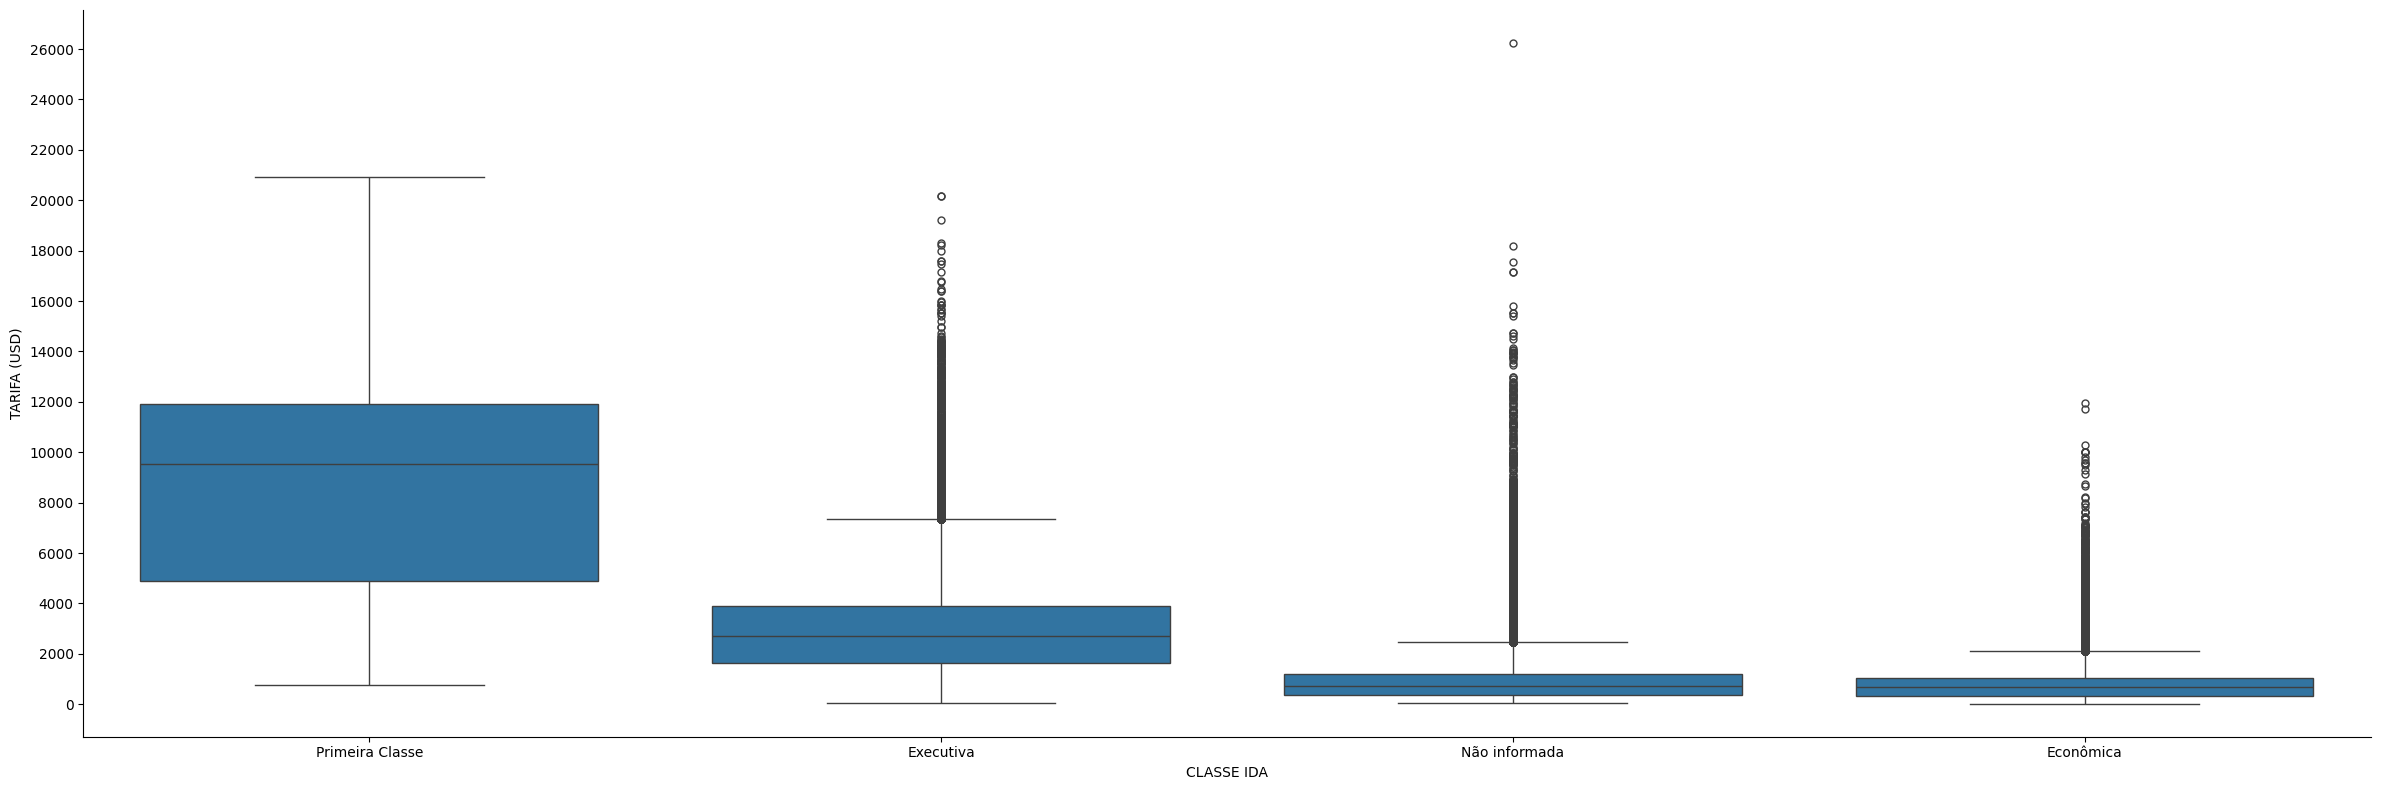

In [ ]:
# Relação tarifa x classe de voo - utilizando box plot
sns.catplot(y='TARIFA (USD)', x='CLASSE IDA', data=data_flight.sort_values('TARIFA (USD)', ascending=False), kind='box', height=8, aspect=3, )
plt.yticks(range(0, 26001, 2000))
plt.show()

**Primeira Classe:** A visualização não indica presença de outliers e tem como valor máximo tarifa em torno de 21000,00 dólares. Já como mínimo: valores em torno de usd 1000,00. A média de preço de passagem margeaia 9000,00 e 75% das passagens custam por volta de até 12000,00 dólares. <br>
**Executiva:** Ao contrário dos dados da Primeira Classe, a classe Executiva apresenta possíveis outliers de maneira densa - que vão de usd 7500.00 a aproximadamente 14000,00 e de forma mais dispersa até em média 20000,00 dólares, seu máximo. Tem como mínimo usd 63,00 e 75% das passagens custam até usd 4000,00. <br>
**Não informada:** Para os voos que não tiveram classe de cabine informada os possíveis outliers de maneira densa vão de usd 2000,00 a aproximadamente usd 14500,00 e de forma mais dispersa até em média 20000,00 dólares, seu máximo chega a 26000,00 - um ponto muito disperso, portanto o dado será excluido. A menor tarifa registrada é em torno de usd 30,00 e 75% das passagens custam até pouco mais de usd 1000,00. <br>
**Econômica:**Tem o menor mínimo dentre as classes de voo, em torno de usd 20,00.75% das passagens vendidas custaram até aproximadamente usd 1000,00. Registra também o menor máximo das categorias, apesar de possíveis outliers, que demonstram passagens por volta de 11000,00 dólares. <br>
<br>

####Análise de outliers:
O box plot acusou grande presença de valores extremos. Abaixo acessaremos esses valores e os substituiremos pela média (por classe de voo) de valores da tarifa. Por conta da variável data (mês e ano), que, além da classe de cabine, pode interferir nos valores o fator a ser utilizado para multiplicação do IQR será 3.0, considerando outliers extremos, e não 1.5, como padrão.  

In [ ]:
# Cálculo dos limites do boxplot
Q1 = data_flight['TARIFA (USD)'].quantile(0.25)
Q3 = data_flight['TARIFA (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Definição dos limites para outliers (uso de fator 3.0 para outliers extremos)
lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

# Filtrando os outliers
outliers = data_flight[(data_flight['TARIFA (USD)'] < lower_bound) | (data_flight['TARIFA (USD)'] > upper_bound)]

# Visualização dos outliers
print(outliers)

        ANO  MES EMPRESA ORIGEM DESTINO RETORNO CLASSE IDA CLASSE VOLTA  \
12     2023    1     AAL   SBGL    KJFK    SBGL  Executiva    Executiva   
13     2023    1     AAL   SBGL    KJFK    SBGL  Executiva    Executiva   
14     2023    1     AAL   SBGL    KJFK    SBGL  Executiva    Executiva   
15     2023    1     AAL   SBGL    KJFK    SBGL  Executiva    Executiva   
16     2023    1     AAL   SBGL    KJFK    SBGL  Executiva    Executiva   
...     ...  ...     ...    ...     ...     ...        ...          ...   
51963  2024    4     UAL   SBGR    KORD    SBGR  Econômica    Econômica   
51964  2024    4     UAL   SBGR    KORD    SBGR  Econômica    Econômica   
51965  2024    4     UAL   SBGR    KORD    SBGR  Econômica    Econômica   
51966  2024    4     UAL   SBGR    KORD    SBGR  Econômica    Econômica   
51967  2024    4     UAL   SBGR    KORD    SBGR  Econômica    Econômica   

       TARIFA (USD)  ASSENTOS  
12           4000.0         1  
13           4340.0         2  
14 

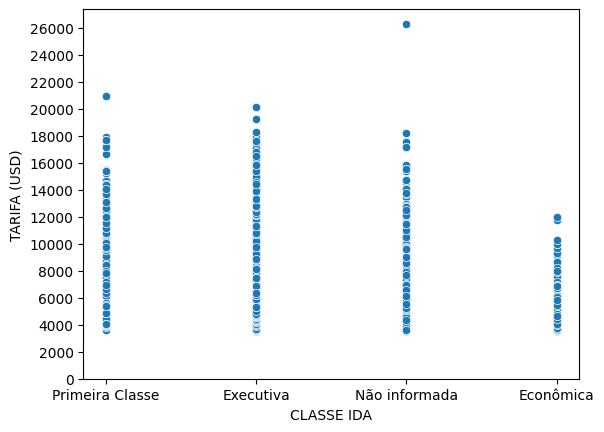

In [ ]:
# Visualização dos outliers
sns.scatterplot(data=outliers, x='CLASSE IDA', y='TARIFA (USD)')
plt.yticks(range(0, 26001, 2000))
plt.show()

In [ ]:
# Função que estabelece os valores limites
def calcular_limites(sub_data_flight):
    Q1 = sub_data_flight['TARIFA (USD)'].quantile(0.25)
    Q3 = sub_data_flight['TARIFA (USD)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR
    return pd.Series([lower_bound, upper_bound], index=['lower_bound', 'upper_bound'])

# Aplicação da função para cada classe de cabine
limites = data_flight.groupby('CLASSE IDA').apply(calcular_limites).reset_index()

# Cálculo da média por classe de cabine para substituição dos outliers
medias_por_classe = data_flight.groupby('CLASSE IDA')['TARIFA (USD)'].mean()

# Estabelecendo função para substituição caso esteja fora dos limites baixo e altos
def substituir_outliers(row, limites, medias):
    classe = row['CLASSE IDA']
    tarifa = row['TARIFA (USD)']
    lower_bound = limites[limites['CLASSE IDA'] == classe]['lower_bound'].values[0]
    upper_bound = limites[limites['CLASSE IDA'] == classe]['upper_bound'].values[0]
    if tarifa < lower_bound or tarifa > upper_bound:
        return medias[classe]
    return tarifa


# Aplicando a função na coluna 'TARIFA' para substituir os outliers
data_flight['TARIFA (USD)'] = data_flight.apply(lambda row: substituir_outliers(row, limites, medias_por_classe), axis=1)

print(data_flight)


        ANO  MES EMPRESA ORIGEM DESTINO     RETORNO CLASSE IDA   CLASSE VOLTA  \
0      2023    1     AAL   SBGL    KJFK  Apenas Ida  Executiva  Não se aplica   
1      2023    1     AAL   SBGL    KJFK  Apenas Ida  Executiva  Não se aplica   
2      2023    1     AAL   SBGL    KJFK  Apenas Ida  Executiva  Não se aplica   
3      2023    1     AAL   SBGL    KJFK  Apenas Ida  Econômica  Não se aplica   
4      2023    1     AAL   SBGL    KJFK  Apenas Ida  Econômica  Não se aplica   
...     ...  ...     ...    ...     ...         ...        ...            ...   
51963  2024    4     UAL   SBGR    KORD        SBGR  Econômica      Econômica   
51964  2024    4     UAL   SBGR    KORD        SBGR  Econômica      Econômica   
51965  2024    4     UAL   SBGR    KORD        SBGR  Econômica      Econômica   
51966  2024    4     UAL   SBGR    KORD        SBGR  Econômica      Econômica   
51967  2024    4     UAL   SBGR    KORD        SBGR  Econômica      Econômica   

       TARIFA (USD)  ASSENT

In [ ]:
data_flight['TARIFA (USD)'].describe().round(2)

,TARIFA (USD)
count,860204.00
mean,930.08
std,915.85
min,20.00
25%,362.00
50%,724.17
75%,1146.00
max,20936.00


Após o tratamento dos outliers utilizaremos o violin plot para verificar o resultado da operação e visualizar a distribuição dos dados com maior eficiência<br>

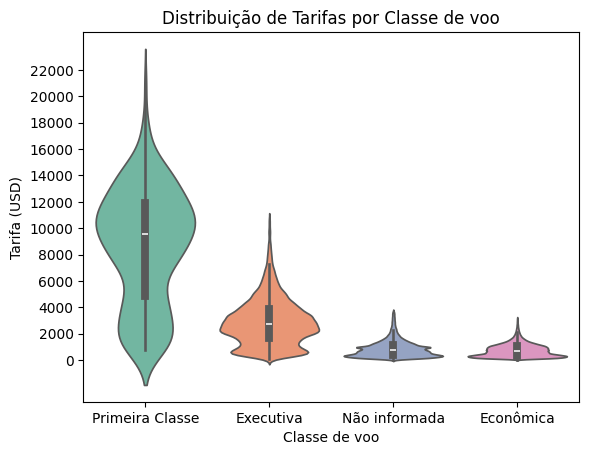

In [ ]:
sns.violinplot(x='CLASSE IDA', y='TARIFA (USD)', data=data_flight, palette='Set2')
plt.title('Distribuição de Tarifas por Classe de voo')
plt.xlabel('Classe de voo')
plt.ylabel('Tarifa (USD)')
plt.yticks(range(0, 22001, 2000))
plt.show()

In [ ]:
# Obtendo dados estatisticos da tarifa de acordo com classe de voo
descricao_por_classe = data_flight.groupby('CLASSE IDA')['TARIFA (USD)'].describe()
print(descricao_por_classe)

                    count         mean          std     min     25%      50%  \
CLASSE IDA                                                                     
Primeira Classe     382.0  8635.119372  4383.507067  773.00  4870.0  9534.50   
Executiva         63808.0  2903.437942  1763.200624   63.00  1632.0  2701.38   
Não informada    162718.0   859.980892   634.423886   27.81   376.5   725.78   
Econômica        633296.0   744.615263   497.284244   20.00   336.0   662.65   

                        75%       max  
CLASSE IDA                             
Primeira Classe  11897.5000  20936.00  
Executiva         3884.0000  10751.00  
Não informada     1147.2875   3702.00  
Econômica         1042.2400   3182.33  


É possível notar que os valores extremos diminuiram consistentemente, o violin plot não acusa presença de outliers. As tarifas estão mais coesas quando relacionadas a proposta de cada classe de cabine e o que cada uma oferta ao passageiro. As áreas de maior densidade no gráfico representam maior quantidade de tarifas vendidas por tal valor. Os valores por classe são os seguintes:
Primeira Classe: aproximadamente USD 11000,00 <br>
Executiva: por volta de 2000,00 dólares <br>
Para as classes "Não informada" e "Econômica": valores por volta de USD 300,00<br>


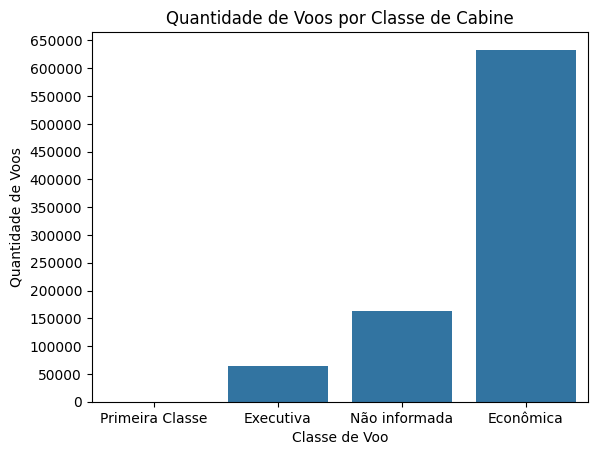

In [ ]:
sns.countplot(x='CLASSE IDA', data=data_flight)
plt.title('Quantidade de Voos por Classe de Cabine')
plt.xlabel('Classe de Voo')
plt.ylabel('Quantidade de Voos')
plt.yticks(range(0, 650001, 50000))
plt.show()

In [ ]:
# Obtendo resumo estatistico da tarifa de acordo com classe de voo
descricao_por_classe = data_flight.groupby('CLASSE IDA')['TARIFA (USD)'].describe()
print(descricao_por_classe)

                    count         mean          std     min     25%      50%  \
CLASSE IDA                                                                     
Primeira Classe     382.0  8635.119372  4383.507067  773.00  4870.0  9534.50   
Executiva         63808.0  2903.437942  1763.200624   63.00  1632.0  2701.38   
Não informada    162718.0   859.980892   634.423886   27.81   376.5   725.78   
Econômica        633296.0   744.615263   497.284244   20.00   336.0   662.65   

                        75%       max  
CLASSE IDA                             
Primeira Classe  11897.5000  20936.00  
Executiva         3884.0000  10751.00  
Não informada     1147.2875   3702.00  
Econômica         1042.2400   3182.33  


Na comparação entre as classes de cabine mais comercializadas entre jan/2023 e abr/2024 verifica-se a compra massiva de passagens para a Classe Econômica, foram, em média, 620000 bilhetes emitidos. Já para a classe econômica foram aproximadamente 60000, praticamente 10% da quantidade de tarifas econômicas.

Ainda analisando a variável "TARIFA (USD)" é relevante a relação com o destino dos voos. <br>
A análise de preço de passagem por destino terá como ferramentas os dados estatísticos e o gráfico de barras para melhor visualização dos dados obtidos sobre o relacionamento.

In [ ]:
# Obtendo dados estatísticos da tarifa de acordo com classe de voo
descricao_por_classe = data_flight.groupby('DESTINO')['TARIFA (USD)'].describe()

# Ordenando os resultados pela tarifa máxima
descricao_por_classe = descricao_por_classe.sort_values(by='max', ascending=False)

# Exibindo o resultado
descricao_por_classe

,count,mean,std,min,25%,50%,75%,max
DESTINO,,,,,,,,
OMDB,1445.0,2626.381125,2758.795232,248.00,968.529109,1520.000,3043.0000,20936.00
LFPG,36250.0,1471.857168,1033.633938,90.81,958.075000,1170.000,1532.0000,17894.00
KMIA,58935.0,1238.591315,1130.512862,82.87,629.915000,856.310,1291.8650,17420.00
LSZH,2817.0,2393.532565,1929.336660,727.00,1234.000000,1711.000,2795.0000,14452.00
EDDF,22766.0,1323.109752,874.885720,68.90,852.000000,1080.370,1443.5025,13712.00
...,...,...,...,...,...,...,...,...
SKBQ,14.0,291.774286,197.248830,134.06,147.035000,225.820,342.3800,717.00
SKRG,40.0,309.832000,173.045551,41.60,171.945000,282.650,438.3425,669.79
SKSP,28.0,274.307857,147.538378,87.60,173.100000,231.475,358.4400,664.88


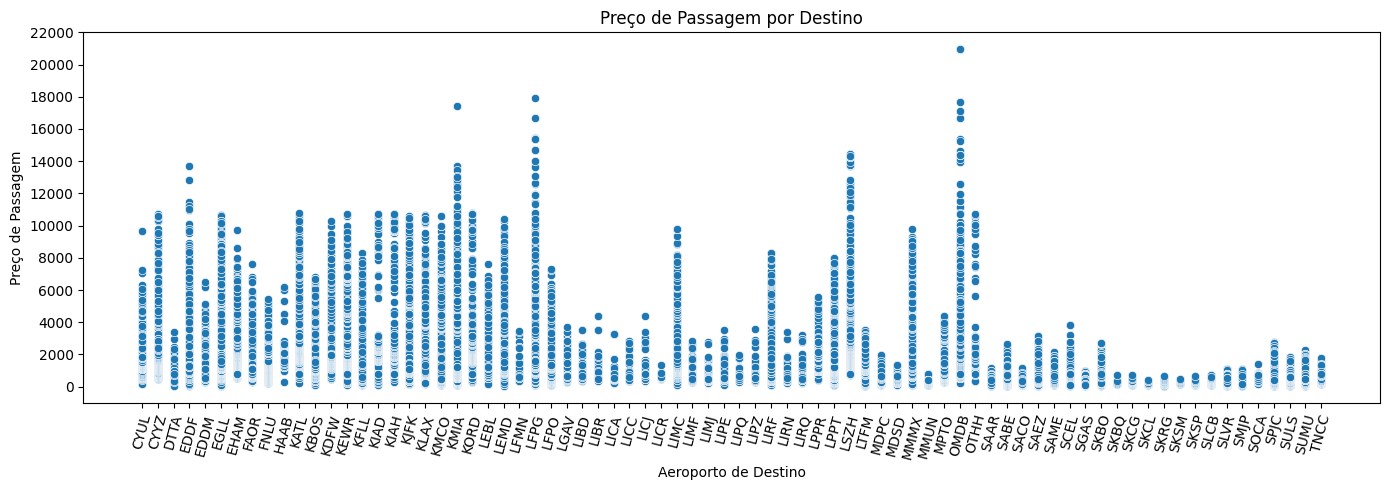

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Preço de Passagem por Destino')

# Usando sns.scatterplot para "personalizar" gráfico
sns.scatterplot(x='DESTINO', y='TARIFA (USD)', data=data_flight, palette='Set2')

plt.xlabel('Aeroporto de Destino')
plt.ylabel('Preço de Passagem')
plt.yticks(range(0, 22001, 2000))
plt.xticks(rotation=75)

# Ajustando layout para evitar sobreposição
plt.tight_layout()

plt.show()

Conforme obtido nas estatísticas e confirmado na visualização acima, através dos códigos ICAO, o Aeroporto Internacional de Dubai (Emirados Árabes) é o destino com maior tarifa aérea - 20936.00 dólares, seguido do Aeroporto de Paris-Charles de Gaulle (França) - USD 17894.00, Aeroporto Internacional de Miami (Estado Unidos da América) - USD 17420.00 -  e Aeroporto de Zurique (Suiça) - USD 14452.00. Os destinos mais caros, a partir do observado, estão no Oriente Médio e Europa, na América o Aeroporto de Miami recebe voos com maiores tarifas. Outros destinos cujas tarifas tem preços elevados são: Aeroporto de Frankfurt (Alemanha), Aeroporto de Milão-Malpensa (Itália),  e Aeroporto Internacional de Hamad (Qatar).

In [ ]:
# Verificação de cada uma das empresas da coluna 'EMPRESA'
data_flight['EMPRESA'].unique()

['AAL', 'ACA', 'AEA', 'AFR', 'AMX', ..., 'VVC', 'SKX', 'DWI', 'AZP', 'SLM']
Length: 35
Categories (35, object): ['AAL', 'ACA', 'AEA', 'AFR', ..., 'THY', 'UAE', 'UAL', 'VVC']

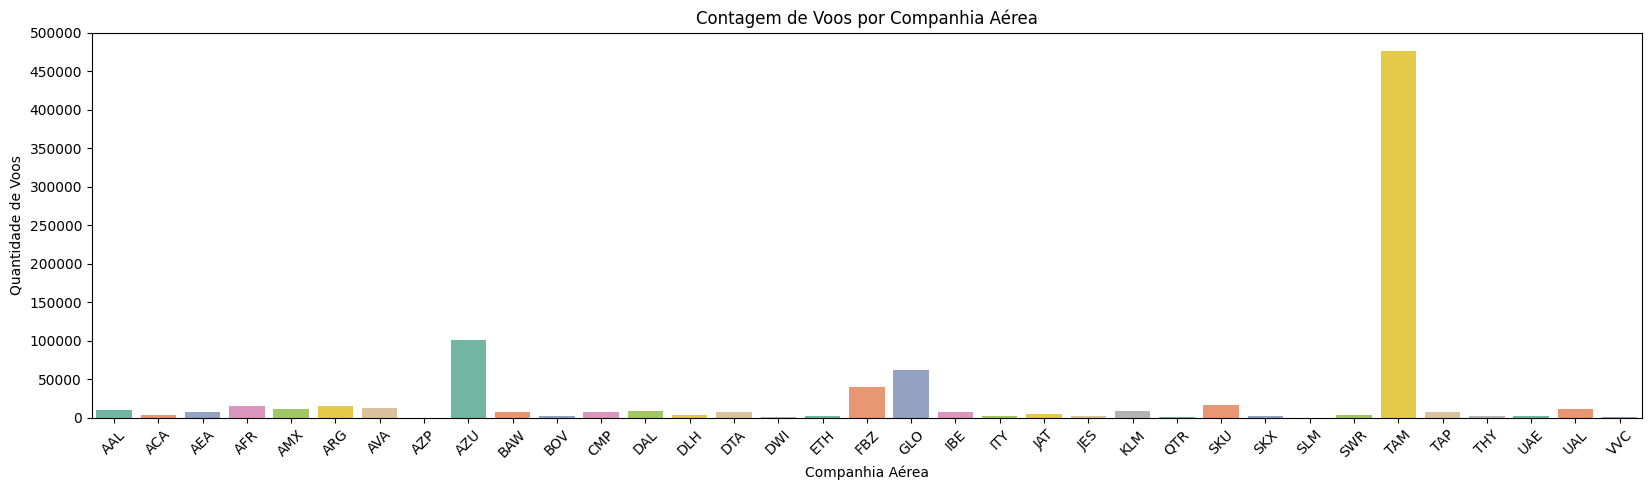

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Contagem de Voos por Companhia Aérea')
ax = sns.countplot(x='EMPRESA', data=data_flight, palette='Set2')
plt.ylim(0, 500000)
plt.yticks(range(0, 500001, 50000))
plt.xlabel('Companhia Aérea')
plt.ylabel('Quantidade de Voos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Contabilizando voos por companhias aéreas - a partir da ocorrencia de "EMPRESA"
data_flight['EMPRESA'].value_counts()

,count
EMPRESA,
TAM,476579
AZU,100259
GLO,61884
FBZ,40149
SKU,16169
AFR,15515
ARG,15250
AVA,12131
AMX,11186


35 companhias aéreas se apresentam como destino de voos saídos do Brasil. As empresas que registram maior número de voos são companhias com participação brasileira. A Latam Airlines opera a maioria dos voos: 476579. Seguida (com bastante distância) pela companhia Azul Linhas Aéreas Brasileiras S/A, que operou 100259 voos e Gol Linhas Aéreas Inteligentes, com 61884 voos operados. A Flybondi, companhia ultra low cost com sede na Argentina também configura na visualização com um número consistente de voos: 40149. <br> As demais companhias apresentam números muito distantes dos já citados, configurando número bem menores de voos que tem aeroportos brasileiros como origem.

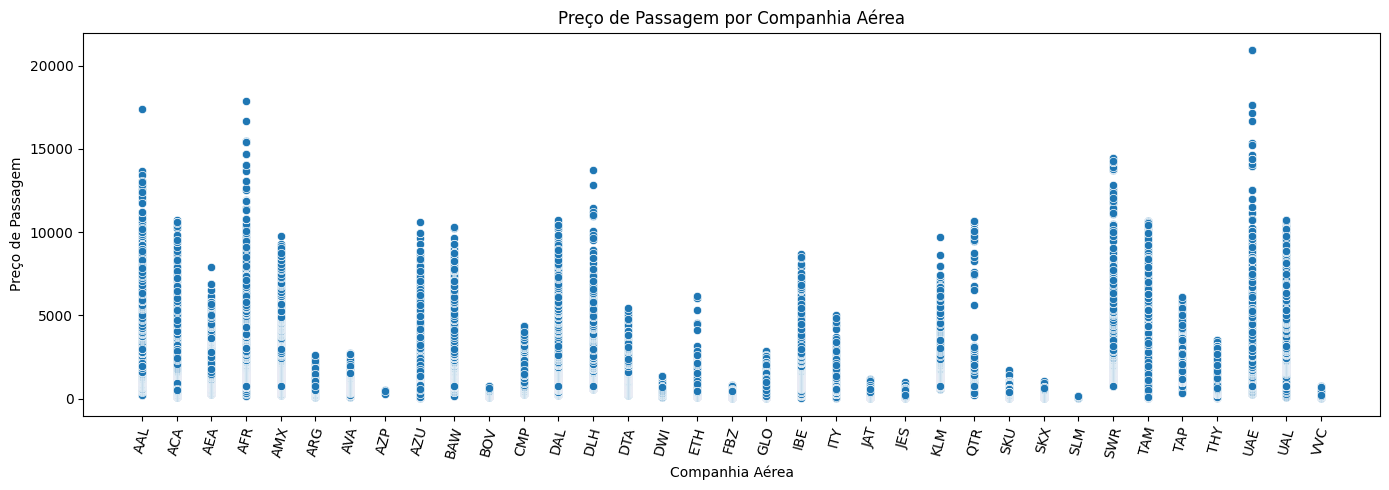

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Preço de Passagem por Companhia Aérea')

# Usar sns.scatterplot para um gráfico mais estilizado
sns.scatterplot(x='EMPRESA', y='TARIFA (USD)', data=data_flight, palette='Set2')

plt.xlabel('Companhia Aérea')
plt.ylabel('Preço de Passagem')
plt.xticks(rotation=75)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.show()

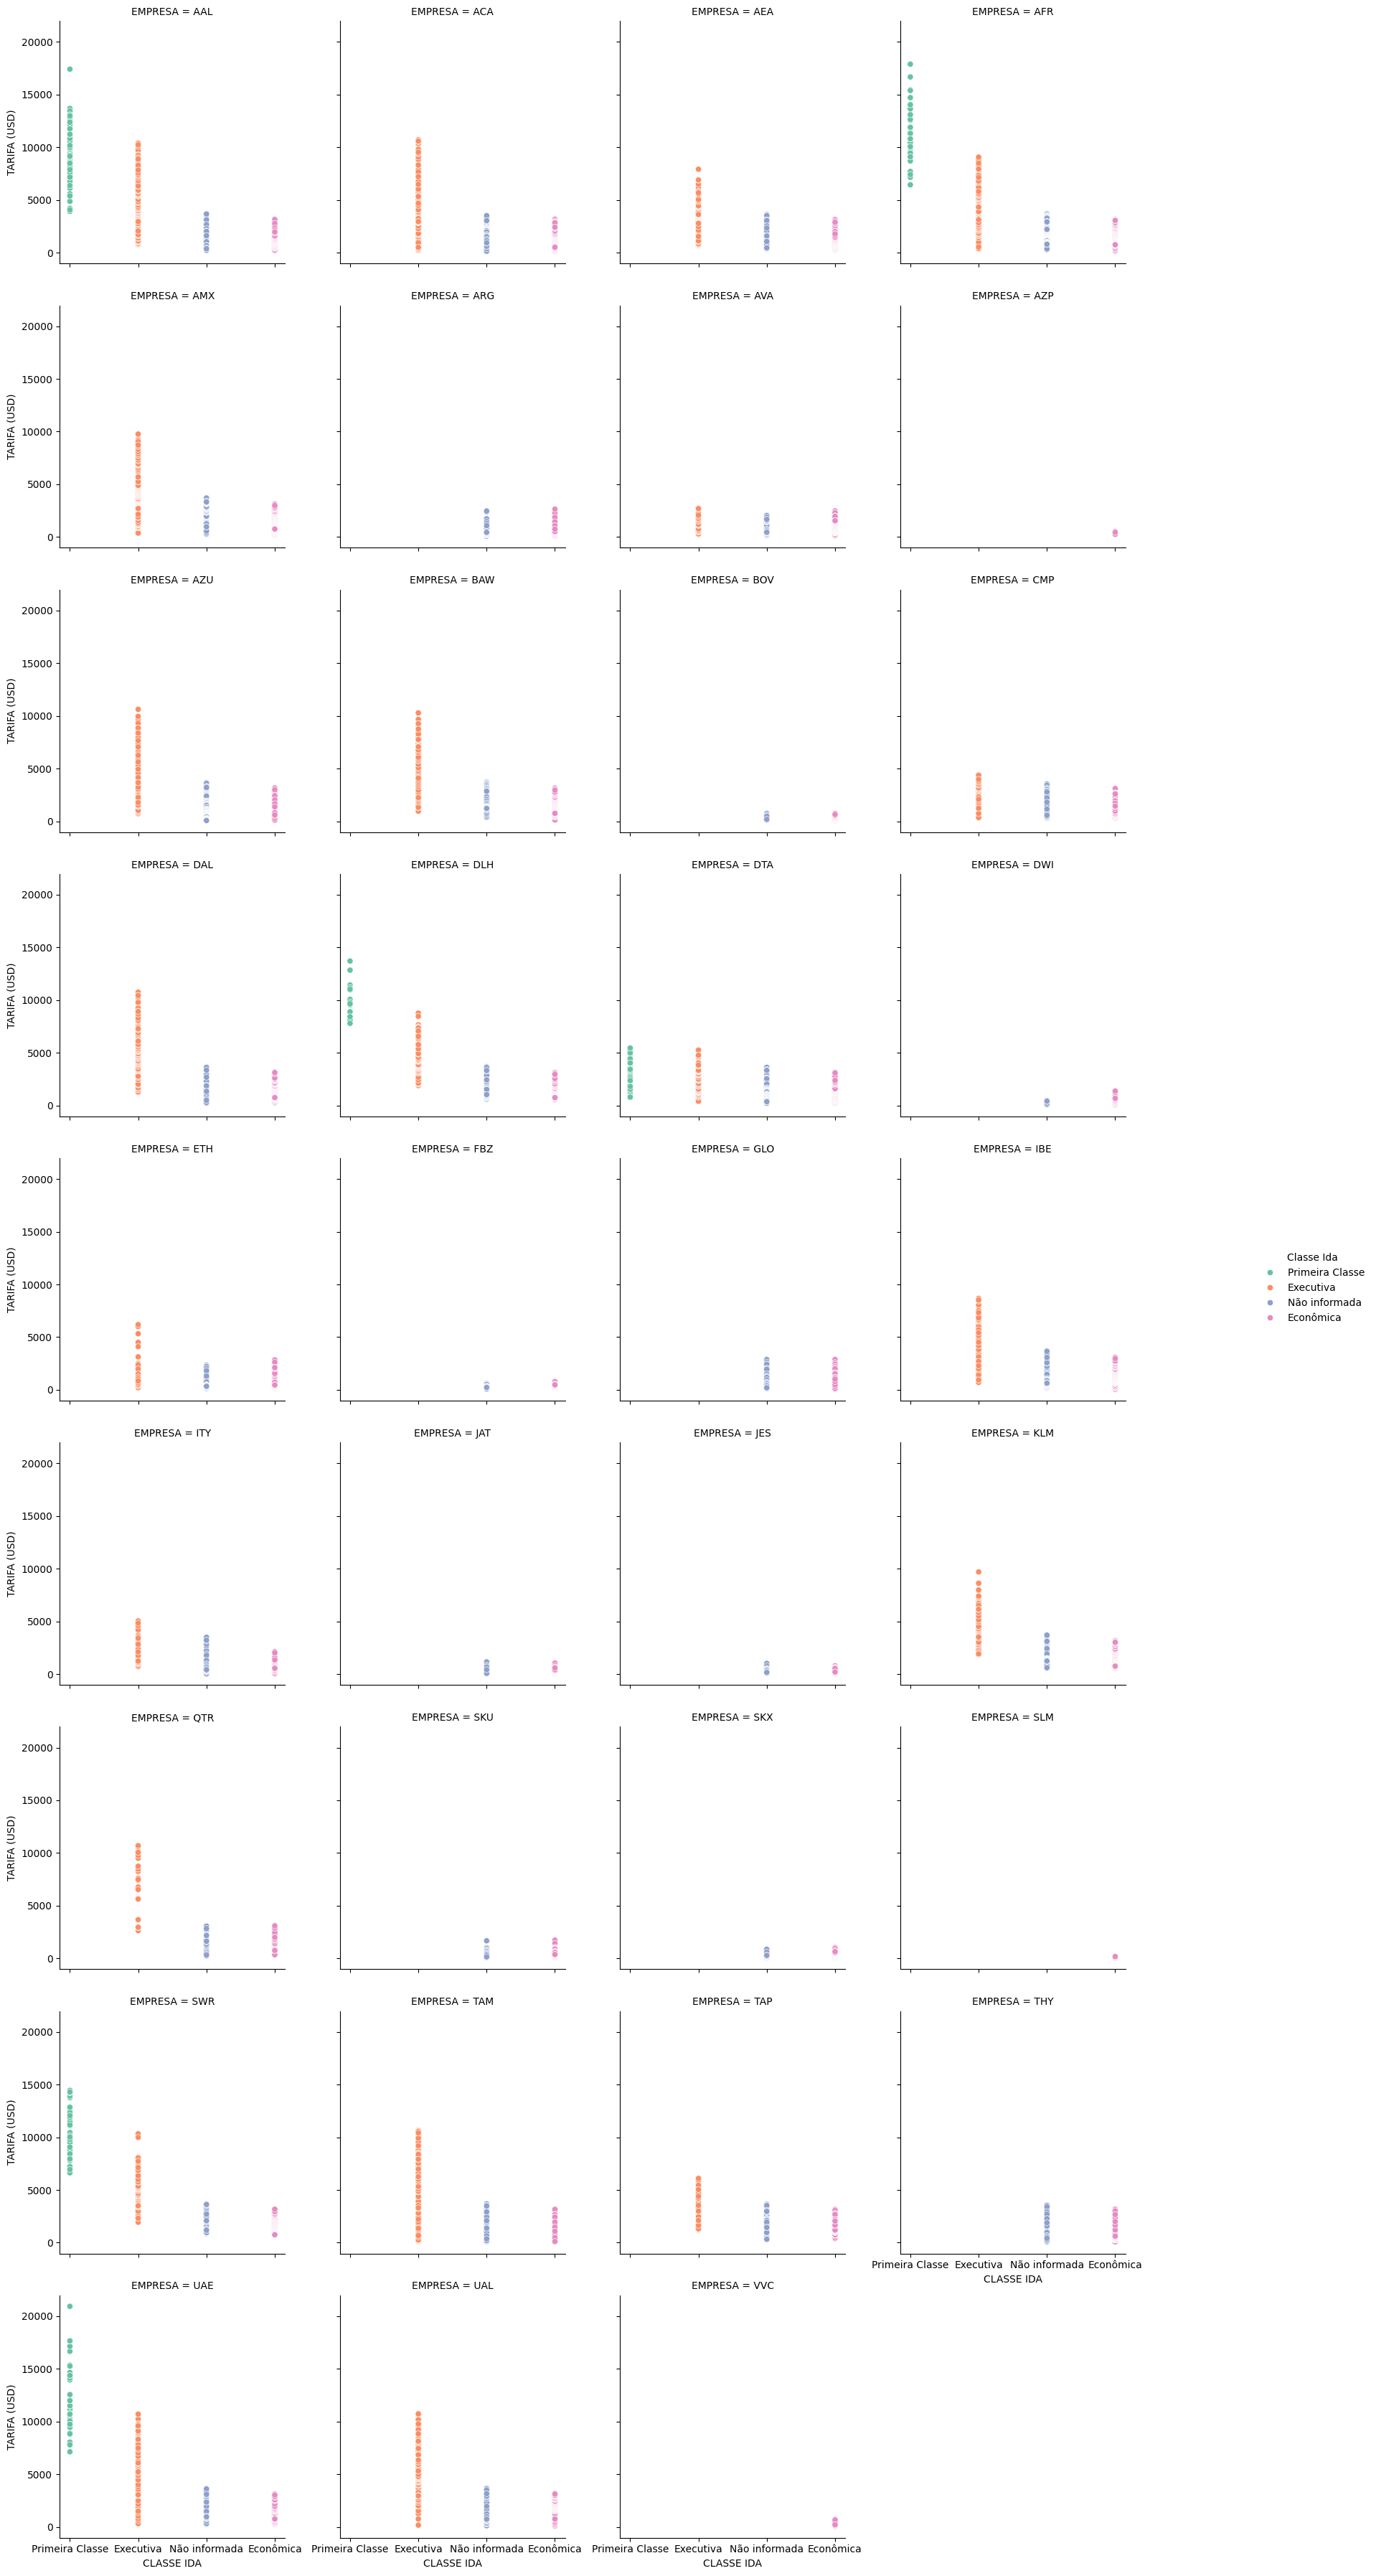

In [ ]:
#Análise de Tarifa por Companhia Aérea e Classe de voo
g = sns.FacetGrid(data_flight, col='EMPRESA', col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x='CLASSE IDA', y='TARIFA (USD)', hue='CLASSE IDA', palette='Set2')
g.add_legend(title='Classe Ida', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

A TAM, operadora de maior quantidde de voos oferta a seus passegeiros classe de cabine econômica e executiva, já a GOL comercializou apenas classe econômica. A paraguaia Paranair e a surinamense Surinam Airways também operaram apenas voos econômicos, a preços baixos. É possível notar que das 35 empresas apenas 6 ofertam o serviço de primeira classe ou pelo menos apenas essas emitiram bilhetes para essa classe de voo. As empresas Air France e American Airlines possuem valores máximos de tarifa de Primeira Classe bem próximos, em torno de 17500.00 dólares. Já chinesa Chengdu Airlines configura a oferta de Primeira Classe mais cara dentre as empresas, superando USD 20000.00.

É relevante para este trabalho perceber a variação de tarifas aéreas no decorrer dos meses. Dessa forma, a visualização abaixo permite conhecer esse movimento auxiliando na criação de padrões informando sobre qual o momento mais propicio para ter acesso a passagens não tão custosas.

<Figure size 1200x600 with 0 Axes>

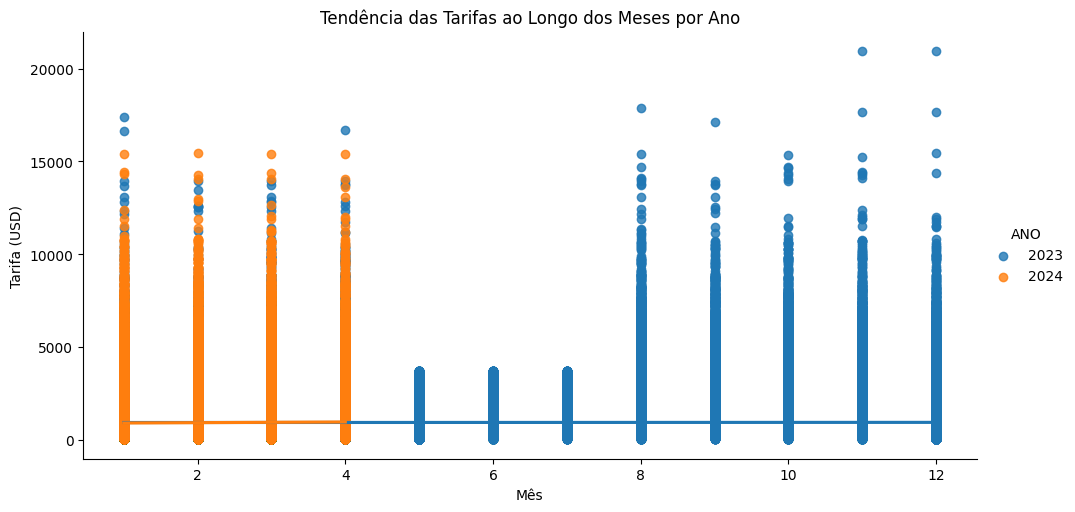

In [ ]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='MES', y='TARIFA (USD)', hue='ANO', data=data_flight, aspect=2, ci=None)
plt.title('Tendência das Tarifas ao Longo dos Meses por Ano')
plt.xlabel('Mês')
plt.ylabel('Tarifa (USD)')
plt.show()

Além das variáveis "Destino" e "Classe de Voo" o mês / ano em que as passagens são compradas interferem no valor da tarifa. É interessante perceber a sazonalidade como uma aliada para oferta e também no momento de compra dessas passagens. Percebe-se, por exemplo, uma grande diferença entre os 4 primeiros meses do ano de 2023 e os 3 meses subsequentes. Em 2024 a alta das passagens nos 4 primeiros meses, como em 2023, se mantém. O movimento ascendente mostra-se nos dois últimos meses o ano de 2023. As passagens, portanto, tem valores mais altos nos primeiros e últimos meses do ano, coincidindo com datas festivas e férias escolares no Brasil. Em 2023 os melhores meses para compra de passagem foram maio, junho e julho, que apresentaram os menores valores. <br>
Ainda que apresente variações a alta das passagens aéreas - tida como problema desse trabalho, se confirma através dos dados.

Para uma análise mais concisa dos dados tratados e assertiva para predição de preços de passagens esse trabalho se propôs a pré-processar os dados de modo a propiciar a criação de uma máquina preditiva. Para tanto, nessa última etapa, faz-se necessário ajustar os dados para linguagem de máquina.
Para criação da máquina preditiva será utilizada regressão linear, algoritmo supervisionado de máquina, que fará estimativa dos valores das tarifas aéreas a partir de dados históricos.
Nesse sentido o dataset será dividido em dois conjuntos: treino e teste, para que a transformação posterior seja consistente e não gere data leakage.
Posteriormente será feito o processo Categorical Encoding, a fim de converter as variáveis categóricas do dataset em números. Para as categóricas nominais 'EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA', e 'CLASSE VOLTA' será aplicado o One-hot Encoding, criando nova coluna binária (1 = presença da categoria; 0 = ausência) para cada categoria. <br>
As colunas 'CLASSE IDA' e 'CLASSE VOLTA' seriam tidas como categóricas ordinais se não fossem a ocorrência de valores "Não informada" e "Apenas ida", os quais são um entrave para a ordinalidade. Dessa forma o Label Encoding deixou de ser a alternativa mais apropriada e o One-Hot Encoding será adotado.

In [ ]:
# Divisão do dataset em X e Y - setando o target, que será eliminado dos conjuntos x
X = data_flight.drop('TARIFA (USD)', axis=1)
Y = data_flight['TARIFA (USD)']

# Dividindo dataset em conjuntos de treino e teste (20% - 80%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplicando One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustando encoder no conjunto de treino e aplicando transformação
X_train_encoded = encoder.fit_transform(X_train[['EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA', 'CLASSE VOLTA']])

# Transformando conjunto de teste
X_test_encoded = encoder.transform(X_test[['EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA', 'CLASSE VOLTA']])

# Convertendo para DataFrame e adicionando de volta as colunas numéricas
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

# Adicionando de volta as colunas numéricas
X_train_final = pd.concat([X_train.reset_index(drop=True).drop(['EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA', 'CLASSE VOLTA'], axis=1), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True).drop(['EMPRESA', 'ORIGEM', 'DESTINO', 'RETORNO', 'CLASSE IDA', 'CLASSE VOLTA'], axis=1), X_test_encoded_df], axis=1)

print(X_train_final.head())
print(X_test_final.head())

    ANO  MES  ASSENTOS  EMPRESA_AAL  EMPRESA_ACA  EMPRESA_AEA  EMPRESA_AFR  \
0  2023    9         1          0.0          0.0          0.0          0.0   
1  2023    5         1          0.0          0.0          0.0          0.0   
2  2023    1         2          0.0          0.0          0.0          0.0   
3  2024    1         1          0.0          0.0          0.0          0.0   
4  2023    8         2          0.0          0.0          0.0          0.0   

   EMPRESA_AMX  EMPRESA_ARG  EMPRESA_AVA  ...  RETORNO_SWSI  \
0          0.0          0.0          0.0  ...           0.0   
1          0.0          0.0          0.0  ...           0.0   
2          0.0          0.0          0.0  ...           0.0   
3          0.0          0.0          0.0  ...           0.0   
4          0.0          0.0          0.0  ...           0.0   

   CLASSE IDA_Econômica  CLASSE IDA_Executiva  CLASSE IDA_Não informada  \
0                   1.0                   0.0                       0.0   
1 

In [ ]:
# Info do conjunto de treino e teste cuja variável dependente / target: 'TARIFA (USD)' foi excluida
print('Tamanho do conjunto de treino:', X_train_final.shape)
print('Tamanho do conjunto de teste:', X_test_final.shape)
print('Tamanho total do dataset:', X_train_final.shape[0] + X_test_final.shape[0])

Tamanho do conjunto de treino: (688163, 304)
Tamanho do conjunto de teste: (172041, 304)
Tamanho total do dataset: 860204


In [ ]:
# Info da coluna que contém apenas a variável dependente / target: 'TARIFA (USD)'
print('Tamanho do conjunto de treino:', y_train.shape)
print('Tamanho do conjunto de teste:', y_test.shape)
print('Tamanho total do dataset:', y_train.shape[0] + y_test.shape[0])

Tamanho do conjunto de treino: (688163,)
Tamanho do conjunto de teste: (172041,)
Tamanho total do dataset: 860204


Nos processos acima o dataset foi dividido em conjuntos de treino e teste. Os conjuntos de treino possuem 80% (688163 registros) dos dados do dataset original e os de teste os 20% (172041 registros) restantes. Para os conjuntos x a coluna do target (TARIFA (USD)) foi removida. Essa variável dependente compõe os conjuntos y de treino e teste, que abriga apenas essa informação, a ser usada para treinar e avaliar o modelo. <br>
<br>

###Conclusão

As etapas percorridas nesse trabalho - que configura um exemplo comum de aprendizado supervisionado com dados rotulados -  são base para a criação do modelo preditivo. Conforme executado na análise exploratória, através do relacionamento das variáveis Classe de voo, Destino, Mes / Ano e Companhia aérea com os valores de tarifas inputados será possível treinar o modelo de forma a prever os preços de passagens de forma efetiva e mais assertiva. Os dados foram devidamente tratados e transformados de modo a facilitar as etapas seguintes para Machine Learning.
